In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Exercice 1 

In [2]:
# initialization
numSteps = 2000
epsilons = [0,0.01,0.1]
numberOfArms = 10

###### Modelling

In [3]:
class Reward:
    def __init__(self,value:float,time:int):
        self.value=value
        self.time=time

In [4]:
class Action:
    def __init__(self):
        self.rewards:list[Reward] = []
        self.meanRewards=0 
#acumulate the action value
    def incrementalActionValue(self,target:Reward):
        stepSize = 1/len(self.rewards)
        oldAV = self.meanRewards
        self.meanRewards = oldAV + stepSize*(target.value - oldAV)  
#push a new Reward 
    def pushReward(self,newReward:Reward):
        self.rewards.append(newReward)
        self.incrementalActionValue(newReward)
    

In [5]:
class BanditProblem():
    def __init__(self,numberOfArms):
    #     assuming the action values follow a gaussian distribution N(0,1)
        self.optimalActionsProportion:list[float]=[]
        self.optimalActions:list[bool]=[]
        self.averageRewards:list[float]=[]
        self.rewards:list[Reward] = []
        self.currentStep = 0
        self.numberOfArms = numberOfArms
        self.actions = [Action() for k in range(self.numberOfArms)]
        self.trueActionValues = np.random.normal(loc=0, scale=1, size=self.numberOfArms)
    def reInit(self):
#         a function to insure the reinitialization of the attributes
        self.optimalActionsProportion:list[float]=[]
        self.optimalActions:list[bool]=[]
        self.averageRewards:list[float]=[]
        self.rewards:list[Reward] = []
        self.currentStep = 0
        self.actions = [Action() for k in range(self.numberOfArms)]
        self.trueActionValues = np.random.normal(loc=0, scale=1, size=self.numberOfArms)
#     get rewards after selecting At : follow gaussian dist of N(q*(At),1)
    def getReward(self,index,t):
        rewardValue = np.random.normal(self.trueActionValues[index],1)
        reward = Reward(value=rewardValue,time=t)
        return reward
#     selecting the action according to the greedy eplison method
    def selectGreedyEpsilon(self,epsilon:float)->Action:
#         random proba 
        proba = np.random.rand()
#     if proba > eplsilon we select a greedy action else we select a random choice
#         the estimated action values 
        means = [x.meanRewards for x in self.actions]
        if proba > epsilon :
#         greedy case
            selectedActionIndex = np.argmax(means)
#         random case
        else :
            selectedActionIndex = np.random.choice(self.numberOfArms)
        
        action = self.actions[selectedActionIndex]
#        adding optimal actions
#         old = 
        self.optimalActions.append(selectedActionIndex == np.argmax(self.trueActionValues))
        self.optimalActionsProportion.append(np.mean(self.optimalActions,axis=0)*100)
        return action,selectedActionIndex
#     let the fun begin
    def startGreedyEpsilon(self,epsilon,steps):
        self.reInit()
        for i in range(steps):
#             select action
            action,actionIndex=self.selectGreedyEpsilon(epsilon)
#     get reward
            reward = self.getReward(index=actionIndex,t=self.currentStep+i)
#     storing the global reward and the global average reward
            self.rewards.append(reward)
            if self.currentStep == 0:
                self.averageRewards.append(reward.value)
            else :
#                 incremental mean implementation
                target = reward.value
                oldVal = self.averageRewards[self.currentStep-1]
                newVal = oldVal + (1/self.currentStep)*(target - oldVal)
                self.averageRewards.append(newVal)
#             storing the reward inside the specefic action
            action.pushReward(reward)
            self.currentStep += 1
        

In [6]:
bandits = [BanditProblem(numberOfArms=numberOfArms) for x in range(len(epsilons))]

In [7]:
# playing or training
for index,bandit in enumerate(bandits):
    bandit.startGreedyEpsilon(epsilon=epsilons[index],steps=numSteps)

#### 1. Illustrate the curve of the average reward as a function of 
#### the number of steps. 

No handles with labels found to put in legend.


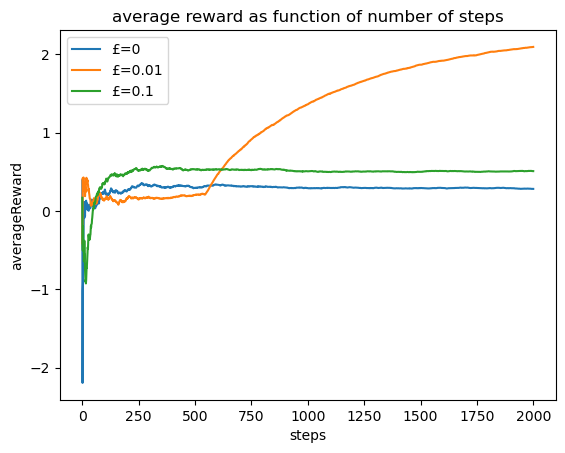

In [8]:
labels = ['£=0','£=0.01','£=0.1']
ax = plt.subplot()
ax.set_xlabel("steps")
ax.set_ylabel("averageReward")
ax.legend()
for index,bandit in enumerate(bandits):
    ax.plot(bandit.averageRewards,label=labels[index])
ax.set_title("average reward as function of number of steps")
ax.legend()

#### 2. Illustrate the curve of the optimal actions as a function of the number of
#### steps.

No handles with labels found to put in legend.


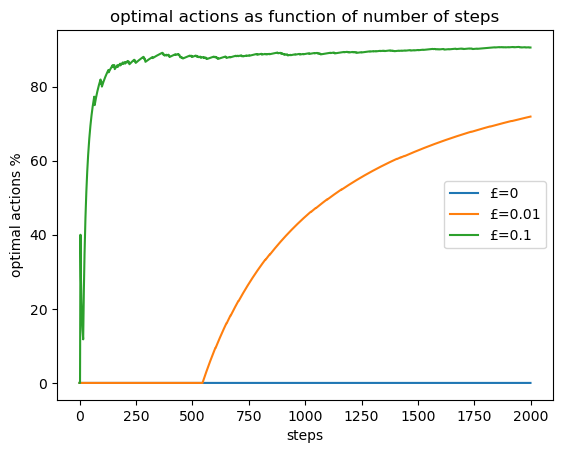

In [9]:
ax = plt.subplot()
ax.set_xlabel("steps")
ax.set_ylabel("optimal actions %")
ax.legend()
for index,bandit in enumerate(bandits):
    ax.plot(bandit.optimalActionsProportion,label=labels[index])
ax.set_title("optimal actions as function of number of steps")
ax.legend()

#### Exercice 3 

In [10]:
class BanditWithUCB(BanditProblem):
    def __init(self,numberOfArms):
        super().__init__(self,numberOfArms)
    
#     ucb selection
    def selectUCB(self,c:float)->Action:
#        init with the estimated action values 
        ucbVector = [x.meanRewards for x in self.actions]
#       N(t) number of time action select prior t
        n = [len(x.rewards) for x in self.actions]
#          the vetor of [Q(a) + c * sqrt(ln(t)/Nt(a))]
        for index,n in enumerate(n):
            if n != 0:
                ucbVector[index] +=  c * np.sqrt(np.log(self.currentStep)/n)
#         select the argmax
        selectedActionIndex = np.argmax(ucbVector)
        action = self.actions[selectedActionIndex]
#        adding optimal actions
#         old = 
        self.optimalActions.append(selectedActionIndex == np.argmax(self.trueActionValues))
        self.optimalActionsProportion.append(np.mean(self.optimalActions,axis=0)*100)
        return action,selectedActionIndex
    def startUCB(self,c,steps):
        self.reInit()
        for i in range(steps):
#             select action
            action,actionIndex=self.selectUCB(c)
#     get reward
            reward = self.getReward(index=actionIndex,t=self.currentStep+i)
#     storing the global reward and the global average reward
            self.rewards.append(reward)
            if self.currentStep == 0:
                self.averageRewards.append(reward.value)
            else :
#                 incremental mean implementation
                target = reward.value
                oldVal = self.averageRewards[self.currentStep-1]
                newVal = oldVal + (1/self.currentStep)*(target - oldVal)
                self.averageRewards.append(newVal)
#             storing the reward inside the specefic action
            action.pushReward(reward)
            self.currentStep += 1

###### Simulate the 10-bandit problem, with different values of ε and c, and   the three proposed approaches. 

###### The greedy method

In [11]:
# number of arms
k = 10
steps = 2000

In [12]:
greedyBandit = BanditProblem(numberOfArms=k)
greedyBandit.startGreedyEpsilon(epsilon=0,steps=2000)

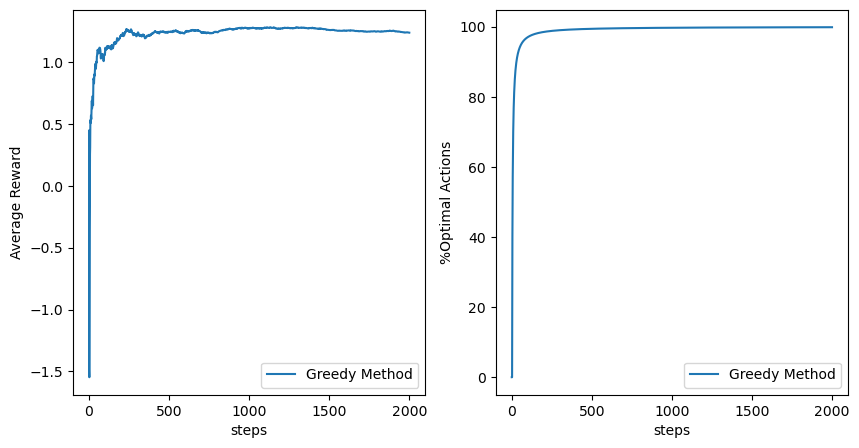

In [13]:
fig,axes = plt.subplots(1,2, figsize=(10, 5))
axes[0].set_xlabel("steps")
axes[1].set_xlabel("steps")

axes[0].set_ylabel("Average Reward")
axes[1].set_ylabel("%Optimal Actions")

axes[0].plot(greedyBandit.averageRewards,label='Greedy Method')
axes[1].plot(greedyBandit.optimalActionsProportion,label='Greedy Method')

axes[0].legend()
axes[1].legend()

plt.show()

###### The Epsilon greedy method

In [14]:
epsilons = [0,0.01,0.5,0.1]
epsilonGreedyBandits = [BanditProblem(numberOfArms=k) for i in range(len(epsilons))]

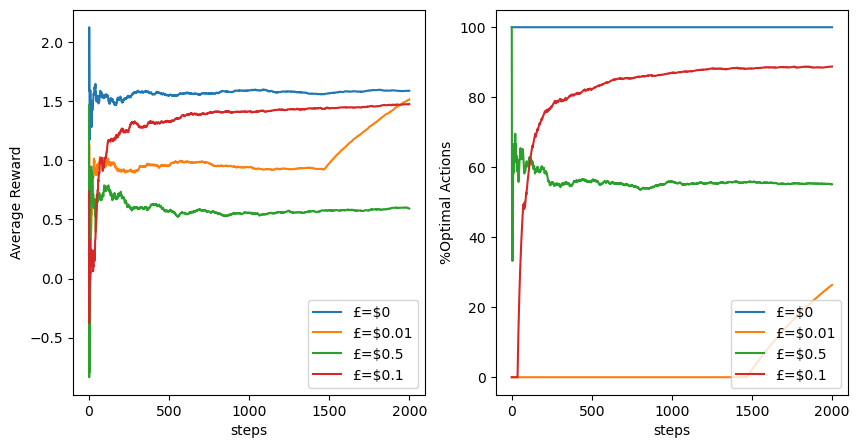

In [15]:
fig,axes = plt.subplots(1,2, figsize=(10, 5))
axes[0].set_xlabel("steps")
axes[1].set_xlabel("steps")

axes[0].set_ylabel("Average Reward")
axes[1].set_ylabel("%Optimal Actions")

for index,bandit in enumerate(epsilonGreedyBandits):
    bandit.startGreedyEpsilon(epsilon=epsilons[index],steps=steps)
    axes[0].plot(bandit.averageRewards,label=f'£=${epsilons[index]}')
    axes[1].plot(bandit.optimalActionsProportion,label=f'£=${epsilons[index]}')


axes[0].legend()
axes[1].legend()

plt.show()

###### The UCB method

In [16]:
cS = [0,1,2,0.5]

In [17]:
ucbs = [BanditWithUCB(numberOfArms=k) for i in range(len(cS))]

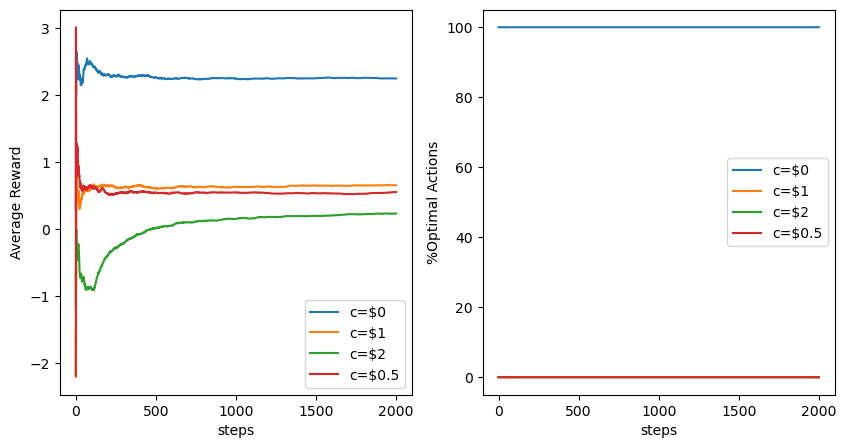

In [18]:
fig,axes = plt.subplots(1,2, figsize=(10, 5))
axes[0].set_xlabel("steps")
axes[1].set_xlabel("steps")

axes[0].set_ylabel("Average Reward")
axes[1].set_ylabel("%Optimal Actions")

for index,ucb in enumerate(ucbs):
    ucb.startUCB(c=cS[index],steps=steps)
    axes[0].plot(ucb.averageRewards,label=f'c=${cS[index]}')
    axes[1].plot(ucb.optimalActionsProportion,label=f'c=${cS[index]}')


axes[0].legend()
axes[1].legend()

plt.show()

####  conclustion : the average reward using the ucb method is higher than the epsilon greedy method 